In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('C://Users//qazif//Desktop//Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


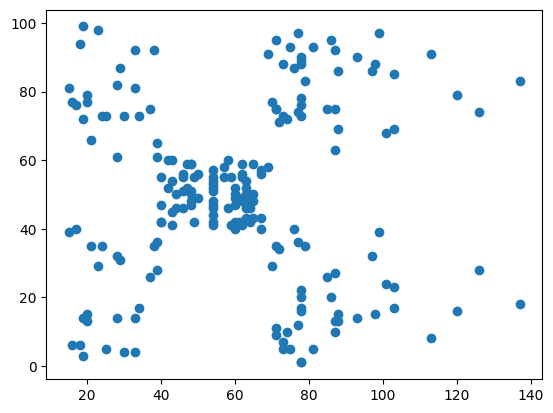

In [10]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
print(df.isnull().sum())
customers_data = df.iloc[:,[3,4]].values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df.iloc[:, [3, 4]])

kmeans = KMeans(2)
kmeans.fit(df_scaled)

clusters = pd.DataFrame(df_scaled, columns=['Feature1', 'Feature2'])
clusters['Cluster_pred'] = kmeans.fit_predict(df_scaled)

WCSS = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    WCSS.append(kmeans.inertia_)

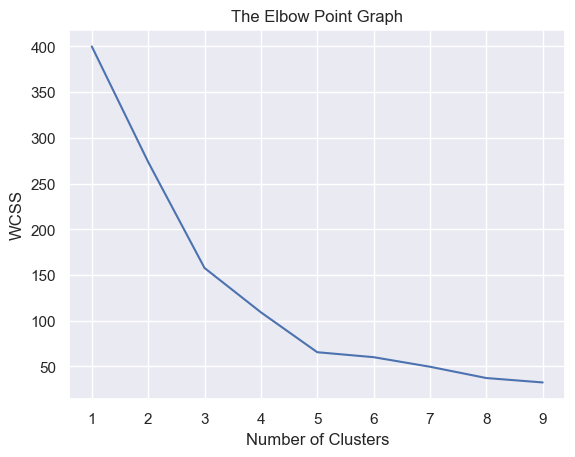

In [14]:
sns.set()
plt.plot(range(1,10), WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
     

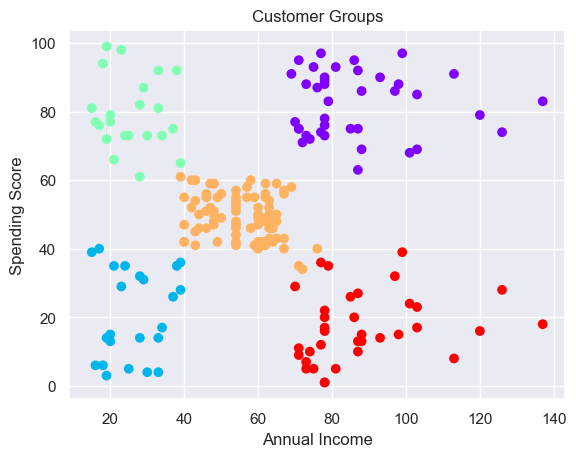

In [17]:
kmeans_new = KMeans(5)
kmeans_new.fit(df_scaled)
clusters_new = df.copy()

clusters_new['Cluster_pred'] = kmeans_new.fit_predict(df_scaled)
# print(clusters_new)

plt.scatter(clusters_new['Annual Income (k$)'], clusters_new['Spending Score (1-100)'], c=clusters_new['Cluster_pred'], cmap='rainbow')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
     